# Assignment 2: Classification
# Using Machine Learning Tools

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of classifying data from histological cell images for the diagnosis of malignant breast cancer. This will be presented as a practical scenario where you are approached by a client to solve a problem.  

The main aims of this assignment are:

- to use the best practice machine learning workflow for producing a solution to a client's problem;
- to visualise and clean data;
- to train and optimise a selection of models, then choose the best;
- to obtain an unbiased measurement of the final model's performance;
- to interpret results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task, but feel free to add additional cells to structure your notebook. Note that some questions require writing code, some require graphical results, and some require comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (**with the correct results displayed**) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code can run correctly on the original data file.

This assignment uses the standard best practice machine learning workflow, building on the first assignment and course workshops, and so less detailed instructions are provided for this assignment. You should be able to implement this workflow now without low-level guidance and a substantial portion of the marks for this assignment are associated with the appropriate choices and executing this workflow correctly and efficiently. Make sure you have clean, readable code as well as producing outputs, since your coding will also count towards the marks (however, excessive commenting is discouraged and will lose marks, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), and [matplotlib](https://matplotlib.org/stable/index.html) as presented in the workshops. Other libraries should not be used (even though they might have nice functionality) and occasionally certain specific functions need to be used, which will be made clear in the instruction text. You are expected to make sure that you are using functions correctly, and you should search and carefully read the documentation if unsure.

# Scenario

A client approaches you to solve a machine learning problem for them.  They run a pathology lab that processes histological images for healthcare providers and they have created a product that measures most of the same features as in the *Wisconsin breast cancer data set* though using different acquisitions and processing methods. Their method employs efficient stochastic sampling, making it much faster than existing methods, although slightly noisier. This method does not measure any of the 'worst' features that appear in the *Wisconsin Breast Cancer Data Set*. They want to be able to diagnose *malignant* cancer (and distinguish them from *benign* growths) by employing machine learning techniques, and they have asked you to implement this for them.

Their requirements are:
 - 1) Have at least a 90% probability of detecting malignant cancer when it is present;
 - 2) Ensure that no more than 1 in 5 healthy cases (those with benign growths) result in a false positive (labeled as malignant).

They have hand-labelled 220 samples for you, with 20 features per sample, which is all they have at the moment.

Please follow the instructions below, which will vary in level of detail.

## 1. Load data, visualise it and identify erroneous values [30%]

 - Load the data from the csv file `assignment2_data_2024.csv` (found on MyUni).
 - Extract the feature names and label names for use later on.
 - Provide at least one text summary of the dataset. This should include key information and characteristics of the data.
 - Create one graphical plot per feature. Each plot must display the feature values for the two classes (malignant and benign) separately on a single axis/panel.
 - Make sure you clearly label the graphical plots with respect to feature names, axes, classes, etc.
 - Identify any erroneous values in the dataset during the data visualisation or summary steps. Determine and implement, here or later, the appropriate action to handle these values (e.g., removal, correction, or none).
 - Throughout this assignment, treat the _malignant_ cases as the _true positive_ class, following the standard convention in medicine.
.

In [1]:
# This code imports some libraries that you will need.
# You should not need to modify it, though you are expected to make other imports later in your code.

import warnings

# To ignore all warnings
warnings.filterwarnings('ignore')


# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import time

# Pandas for overview
import pandas as pd

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Plot setup
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=7)
mpl.rc('xtick', labelsize=6)
mpl.rc('ytick', labelsize=6)
mpl.rc('figure', dpi=240)
plt.close('all')

import seaborn as sns

In [2]:
# Reading the Dataset 

df=pd.read_csv('./Breast Cancer Data 2024.csv')

In [3]:
df.info()

# Identified label and mean radius as object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    220 non-null    object 
 1   mean radius              220 non-null    object 
 2   mean texture             220 non-null    float64
 3   mean perimeter           220 non-null    float64
 4   mean area                220 non-null    float64
 5   mean smoothness          220 non-null    float64
 6   mean compactness         220 non-null    float64
 7   mean concavity           220 non-null    float64
 8   mean concave points      220 non-null    float64
 9   mean symmetry            220 non-null    float64
 10  mean fractal dimension   220 non-null    float64
 11  radius error             220 non-null    float64
 12  texture error            220 non-null    float64
 13  perimeter error          220 non-null    float64
 14  area error               2

In [4]:
# Changing the mean radius to numeric for visualization and model training

df['mean radius']=pd.to_numeric(df['mean radius'],errors='coerce')

In [5]:
# Checking the how many label values are present
df['label'].unique()

# Identified label is misspelled

array(['malignant', 'maligant', 'benign'], dtype=object)

In [6]:
# Replacing the misspelled label and changing them to Categorical Data 1-malignant 0-benign
df['label']=df['label'].replace('maligant','malignant')

df['label']=pd.Categorical(df['label']).codes

In [7]:

df.describe().T

# From the results identified negative values for few features

count        mean         std        min         25%  \
label                    220.0    0.300000    0.459303   0.000000    0.000000   
mean radius              219.0   13.693313    2.176062 -14.292182   13.092060   
mean texture             220.0   18.991963    1.427635  15.349270   17.914319   
mean perimeter           220.0   89.866240    7.366180  74.690886   84.911981   
mean area                220.0  620.956227  106.419871  -2.645499  558.731832   
mean smoothness          220.0    0.096480    0.004961   0.084651    0.092797   
mean compactness         220.0    0.102879    0.019819   0.075184    0.089531   
mean concavity           220.0    0.085281    0.026911   0.050771    0.066525   
mean concave points      220.0    0.046867    0.012548   0.028701    0.038106   
mean symmetry            220.0    0.181850    0.010816   0.157059    0.174944   
mean fractal dimension   220.0    0.103957    0.606979   0.058922    0.061139   
radius error             220.0    0.393337    0.075828   0.298005    0.343114   
texture error            220.0    1.217593    0.210182   0.898026    1.073344   
perimeter error          220.0    2.775090    0.579317   2.059186    2.394331   
area error               220.0   37.781034    9.988655  27.693748   31.843894   
smoothness error         220.0    0.007076    0.001043   0.004994    0.006372   
compactness error        220.0    0.025514    0.007345   0.016907    0.020530   
concavity error          220.0    0.031901    0.014102   0.018730    0.025373   
concave points error     220.0    0.011762    0.002422   0.007253    0.010336   
symmetry error           219.0    0.020901    0.003250   0.016181    0.018658   
fractal dimension error  220.0    0.003873    0.001259   0.002631    0.003225   

                                50%         75%          max  
label                      0.000000    1.000000     1.000000  
mean radius               13.647143   14.272883    18.200299  
mean texture              18.928256   19.995859    24.430831  
mean perimeter            88.587737   93.066393   121.247839  
mean area                603.806128  655.690435  1103.740620  
mean smoothness            0.096457    0.099817     0.113423  
mean compactness           0.098517    0.113276     0.192880  
mean concavity             0.075748    0.098826     0.201971  
mean concave points        0.042761    0.055337     0.100467  
mean symmetry              0.180953    0.186354     0.226448  
mean fractal dimension     0.062557    0.064184     9.065897  
radius error               0.367863    0.420514     0.712896  
texture error              1.165727    1.300769     2.561348  
perimeter error            2.610732    3.003888     5.903661  
area error                34.007608   39.042484    80.619370  
smoothness error           0.006837    0.007675     0.011088  
compactness error          0.023147    0.027733     0.054950  
concavity error            0.028835    0.033620     0.163592  
concave points error       0.011357    0.012669     0.026554  
symmetry error             0.020193    0.022195     0.041861  
fractal dimension error    0.003555    0.004046     0.013251

In [8]:
# Replacing the Negative Values with NaN to impute later

df = df.where(df >= 0, np.nan)

In [9]:
# Checking if there is any null value or NaN in the dataset
df.isna().sum()

label                      0
mean radius                2
mean texture               0
mean perimeter             0
mean area                  1
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             1
fractal dimension error    0
dtype: int64

In [10]:
# Extracting the features and target separately for model training

target=df['label']
features=df.drop('label',axis=1)

print(target)
print(features.columns)

0      1
1      1
2      1
3      1
4      1
      ..
215    0
216    0
217    0
218    0
219    0
Name: label, Length: 220, dtype: int8
Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error'],
      dtype='object')


In [11]:
# Plotting Histogram for every feature to see the distribution of data with respect to labels

plt.figure(figsize=(30, 30))

# Loop through each column in the DataFrame and create a subplot for each
for i, column in enumerate(df.columns[1:]): # Ignored the Label Column
    plt.subplot(5, 4, i + 1)
    sns.histplot(data=df, x=column, kde=True, hue='label', multiple='stack')
    plt.title(column)

# Adjust the layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle("Distribution of every feature before Handling errorneous values",y=0.98, fontsize=16)
# Show the plot
plt.show()


In [12]:
# Plotting the Boxplot of every feature to visualize the outliers

plt.figure(figsize=(30, 30))

# Loop through each column in the DataFrame and create a subplot for each
for i, column in enumerate(df.columns[1:]):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(data=df,x=column)
    plt.title(column)

# Adjust the layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle("BoxPlot of every feature before Handling errorneous values",y=0.98, fontsize=16)
# Show the plot
plt.show()

In [13]:
# From the above plots, Identified the erroneous values and applied a threshold measure to replace any values above this threshold with NaN.

# Replace mean perimeter > 115 with NaN
df.loc[df['mean perimeter'] > 115, 'mean perimeter'] = np.nan

# Replace mean fractal dimension > 1 with NaN
df.loc[df['mean fractal dimension'] > 1, 'mean fractal dimension'] = np.nan

# Replace texture error > 2.15 with NaN
df.loc[df['texture error'] > 2.15, 'texture error'] = np.nan

# Replace concavity error > 0.9 with NaN
df.loc[df['concavity error'] > 0.09, 'concavity error'] = np.nan

# Replace symmetry error > 0.030 with NaN
df.loc[df['symmetry error'] > 0.030, 'symmetry error'] = np.nan

# Replace fractal dimension error > 0.006 with NaN
df.loc[df['fractal dimension error'] > 0.006, 'fractal dimension error'] = np.nan

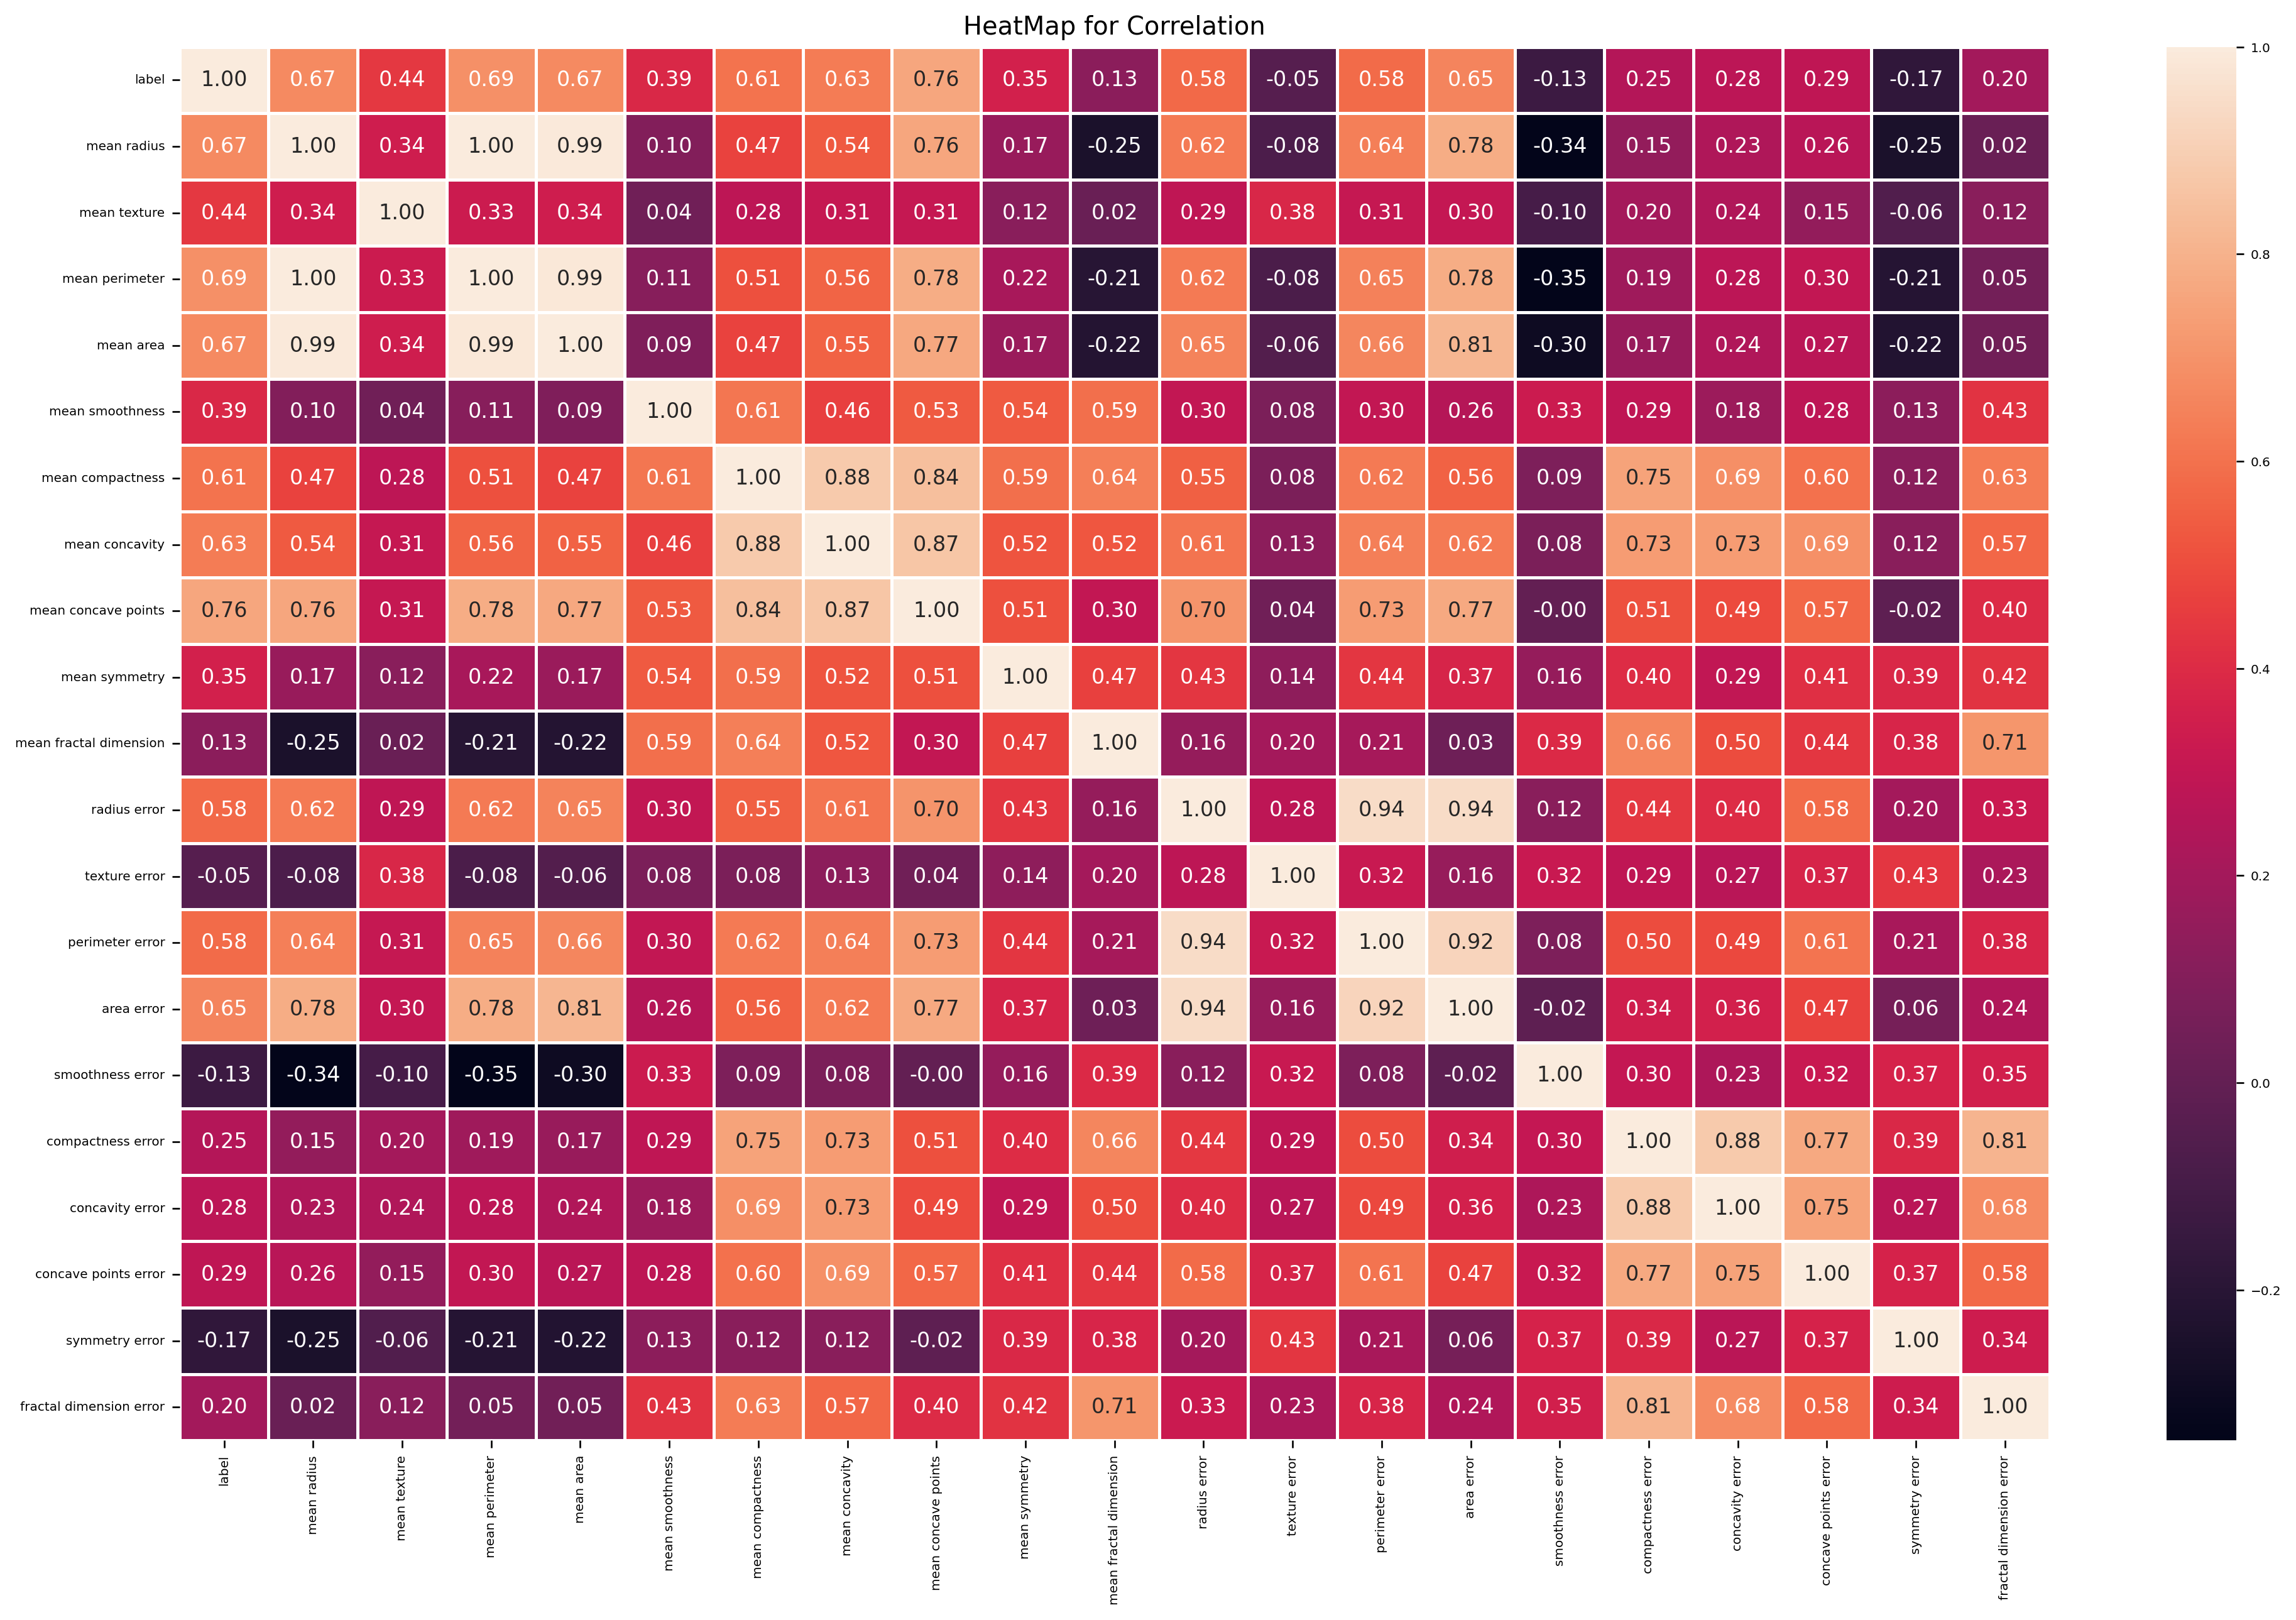

In [14]:
# Plotting HeatMap to See Highly Correlated Featured to the Target Variable
plt.figure(figsize = (20, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, linewidths = 1, annot = True, fmt = ".2f")
plt.title("HeatMap for Correlation")
plt.show()

## Findings:
 - I have histogram plot with Target value as Hue to see how the classes are distributed in every feature to find if any feature is easily distinguishable for the target
 - Few Errorneous Data like Negative values, Label name misspelled, Outliers and changing the object to numerical values for easy modelling has been done here
 - From the Correlation HeatMap, I have found that few features/ columns donot correlate with the target variable making it not usable for the training as they are considered noise as they dont affect the outcome



## 2. Prepare data and models, and make baseline measurements [20%]
 - Split data into appropriate sets using the `stratify` option to obtain consistent proportions of classes in each set.
 - Decide on appropriate pre-processing steps for the data.
 - Implement a _very_ simple baseline model that makes purely random predictions of the class.
 - Measure the baseline performance with the following metrics:
   - accuracy
   - balanced accuracy: accounts for imblanaced datasets, defined as _(sensitivity + specificity)/2_
   - recall
   - precision
   - auc
   - f1score
   - fbeta_scores with beta=0.1
   - fbeta_score with beta=10
 - Also display a confusion matrix for the baseline predictions.
 - As a second baseline, implement an SGD classifier and fit it once (without hyper-parameter optimisation) and then display the same performance metrics and a confusion matrix for its results.

In [15]:
# Some helpful code that you can use if you wish (or not)
# f-beta score metric using beta=10 and 0.1 and auc scorer


from sklearn.metrics import roc_curve,auc,fbeta_score, make_scorer

def f10_score(yt,yp):
    return fbeta_score(yt, yp, beta=10)

def f01_score(yt,yp):
    return fbeta_score(yt, yp, beta=0.1)
    
def auc_scorer(y_true, y_pred_prob):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    return auc(fpr, tpr)

auc_scoring = make_scorer(auc_scorer, greater_is_better=True, needs_proba=True)
f10_scorer = make_scorer(fbeta_score, beta=10)
f01_scorer = make_scorer(fbeta_score, beta=0.1)

In [16]:
# Splitting the Data using Train_test_split and stratify
from sklearn.model_selection import train_test_split

# Splitting the data into Training and Testing
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,stratify=target,random_state=42)

# Splitting the Training data to Training and Validation set
X_train_final,X_val,y_train_final,y_val=train_test_split(X_train,y_train,test_size=0.2,stratify=y_train,random_state=42)

# Checking the split of the class to different sets
print(np.mean(X_train_final))
print(np.mean(X_test))
print(np.mean(X_val))



# Checking class distribution in the training set
print("Class distribution in y_train:")
print(pd.Series(y_train_final).value_counts(normalize=True)*100)

# Checking class distribution in the validation set
print("Class distribution in y_val:")
print(pd.Series(y_val).value_counts(normalize=True)*100)

# Checking class distribution in the test set
print("Class distribution in y_test:")
print(pd.Series(y_test).value_counts(normalize=True)*100)

39.439346232376664
39.072403014146445
39.37947265908657
Class distribution in y_train:
label
0    70.0
1    30.0
Name: proportion, dtype: float64
Class distribution in y_val:
label
0    69.444444
1    30.555556
Name: proportion, dtype: float64
Class distribution in y_test:
label
0    70.454545
1    29.545455
Name: proportion, dtype: float64


In [17]:
# necessary imports for metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, roc_curve, auc , f1_score

# This is a Method to Print the Measurement of all the Metrics of a model

def prnt_metrics(yt,yp,model):

  print(f"Accuracy for the {model} Classifier",accuracy_score(yt,yp))

  print(f"Balanced Accuracy for the {model} Classifier",balanced_accuracy_score(yt,yp))

  print(f"Precision for the {model} Classifier",precision_score(yt,yp))

  print(f"Recall for the {model} Classifier",recall_score(yt,yp))

  print(f"F1-score for the {model} Classifier",f1_score(yt,yp))

  
  print(f"ROC AUC of {model}:", auc_scorer(yt,yp))


  print(f"F0.1 score for the {model} Classifier",f01_score(yt,yp))

  print(f"F10 score for the {model} Classifier",f10_score(yt,yp))

  print(f"Confusion Matrix for the {model} Classifier")
  cm=confusion_matrix(yt,yp)

  plt.figure(figsize=(2,2))
  sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False,
              xticklabels=['Predicted 0', 'Predicted 1'],
              yticklabels=['Actual 0', 'Actual 1'])
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title(f'Confusion Matrix of {model} Model')
  plt.show()

In [18]:
# Baseline Model
# It is a simple function that predicts 0 or 1 randomly with 50/50 chance

def random_baseline_predict(num_samples):
    # Generate random predictions (0 or 1) with equal probability
    predictions = np.random.randint(0, 2, size=num_samples)
    return predictions

Accuracy for the Random Classifier 0.5555555555555556
Balanced Accuracy for the Random Classifier 0.5018181818181818
Precision for the Random Classifier 0.3076923076923077
Recall for the Random Classifier 0.36363636363636365
F1-score for the Random Classifier 0.3333333333333333
ROC AUC of Random: 0.5018181818181818
F0.1 score for the Random Classifier 0.30816170861937453
F10 score for the Random Classifier 0.36298292902066487
Confusion Matrix for the Random Classifier


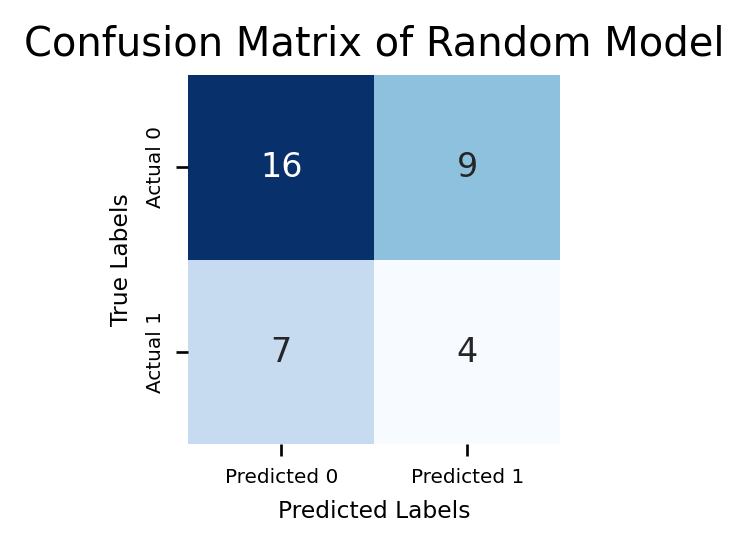

In [19]:
# Prediction using the Baseline Random Model

size=X_val.shape[0]
random_predictions = random_baseline_predict(size)
prnt_metrics(y_val,random_predictions,"Random")

In [20]:
# Pre-Processing Decisions:
# Step 1: Imputation using SimpleImputer with median
# Step 2: Scaling the data using StandardScaler provided by sklearn

from sklearn.impute import SimpleImputer


Pre_pipeline=Pipeline([
     ('impute',SimpleImputer(strategy="median")),
      ('scale',StandardScaler())])


Accuracy for the SGD Classifier 0.8611111111111112
Balanced Accuracy for the SGD Classifier 0.8745454545454545
Precision for the SGD Classifier 0.7142857142857143
Recall for the SGD Classifier 0.9090909090909091
F1-score for the SGD Classifier 0.8
ROC AUC of SGD: 0.8745454545454546
F0.1 score for the SGD Classifier 0.7158043940467753
F10 score for the SGD Classifier 0.9066427289048474
Confusion Matrix for the SGD Classifier


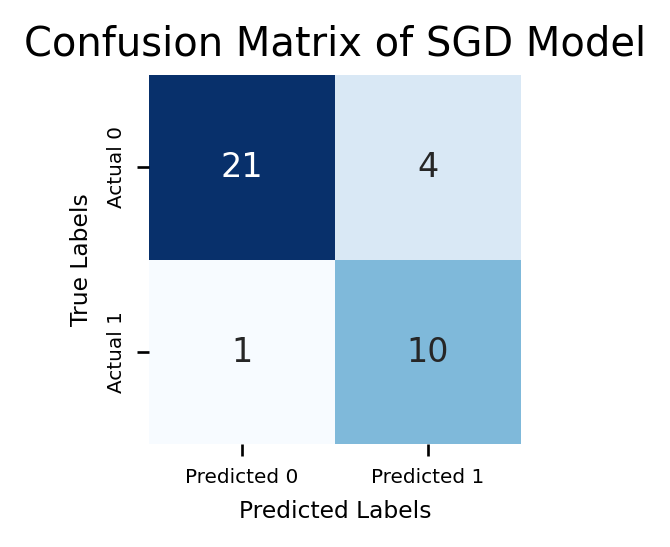

In [21]:
# Baseline-2 using SGDClassifier with pre-processing as we have NaN values which the model cant process 

from sklearn.linear_model import SGDClassifier

sgd_lin=Pipeline([
    ('pre_process',Pre_pipeline),
    ('sgd',SGDClassifier(random_state=42))
])

sgd_lin.fit(X_train_final,y_train_final)
y_pred=sgd_lin.predict(X_val)

prnt_metrics(y_val,y_pred,"SGD")

## 3. Model Optimisation [40%]

### 3.1 Performance metric
Choose one performance metric from the above set. State your choice and explain why you chose it. [50 words maximum]

# Answer here
Choice of Metric:
  - My Choice would be the AUC score as the performance metric for its balance between True Positive Rate (TPR) and False Positive Rate (FPR) and suits for my requirements
  - My requirements are: TPR (recall) > 90% and FPR ≤ 20%.

### 3.2 Hyper-parameter optimisation
 - Perform a hyper-parameter optimisation (using appropriate methods) on three models:
   - SGD Classifer
   - SVM
   - One other model of your choice
 - Display the results of each model (including confusion matrices) and choose the best model.
 - Choose the best model and display the final results of this model.

In [22]:
# Define a function to calculate and store metrics
def calculate_metrics(y_true, y_pred):
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'balanced_accuracy': balanced_accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='weighted'),
        'recall': recall_score(y_true, y_pred, average='weighted'),
        'f1': f1_score(y_true, y_pred, average='weighted'),
        'roc_auc': auc_scorer(y_true, y_pred),
        'f0.1score': fbeta_score(y_true, y_pred, beta=0.1, average='weighted'),
        'f10score': fbeta_score(y_true, y_pred, beta=10, average='weighted')
    }
    return metrics

In [23]:
# Defining the scoring method for GridSearchCV
scoring = {
    'accuracy': 'accuracy',
    'balanced_accuracy': 'balanced_accuracy',
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
    'roc_auc': auc_scorer,
    'f0.1score': f01_scorer,
    'f10score': f10_scorer
}

# All the metrics that being measured for a model
metrics = ['accuracy', 'balanced_accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'f0.1score', 'f10score']

accuracy: Mean = 0.920, Std = 0.046
balanced_accuracy: Mean = 0.910, Std = 0.049
precision: Mean = 0.924, Std = 0.044
recall: Mean = 0.920, Std = 0.046
f1: Mean = 0.921, Std = 0.045
roc_auc: Mean = 0.910, Std = 0.049
f0.1score: Mean = 0.924, Std = 0.044
f10score: Mean = 0.920, Std = 0.046
Combined Confusion Matrix:
[[115   8]
 [  6  47]]



The best Parameters are  {'sgd__alpha': 0.0001, 'sgd__loss': 'hinge', 'sgd__penalty': 'l2'}
Accuracy for the SGD Classifier 0.9545454545454546
Balanced Accuracy for the SGD Classifier 0.9230769230769231
Precision for the SGD Classifier 1.0
Recall for the SGD Classifier 0.8461538461538461
F1-score for the SGD Classifier 0.9166666666666666
ROC AUC of SGD: 0.9230769230769231
F0.1 score for the SGD Classifier 0.9982030548068282
F10 score for the SGD Classifier 0.84744469870328
Confusion Matrix for the SGD Classifier


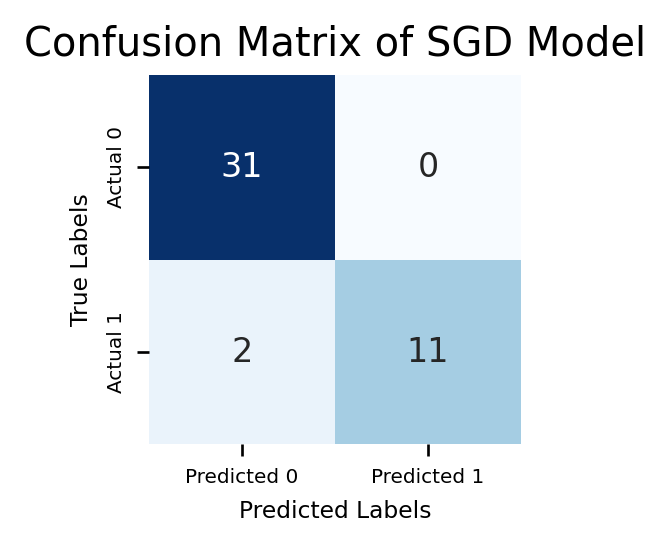

In [24]:
# Using StratifiedKFold to preserve the class Proportion
from sklearn.model_selection import StratifiedKFold

# Define the SGD pipeline
sgd_pipeline = Pipeline([
    ('pre_process', Pre_pipeline),
    ('sgd', SGDClassifier(random_state=42))
])

# Define the parameters for GridSearchCV
sgd_params = {
    'sgd__loss': ['hinge', 'log', 'perceptron', 'squared_loss'],
    'sgd__penalty': ['l2', 'l1', 'elasticnet'],
    'sgd__alpha': [0.0001, 0.001, 0.01, 0.1]
}

# Perform GridSearchCV
sgd_grid = GridSearchCV(sgd_pipeline, param_grid=sgd_params, cv=5, scoring=scoring, refit='roc_auc', return_train_score=True)
sgd_grid.fit(X_train, y_train)

# Access the cv_results_ attribute
cv_results = sgd_grid.cv_results_

# Store the Best of SGD Estimator for later use
sgd_best = sgd_grid.best_estimator_

# Confusion matrix and metrics for each fold
kf = StratifiedKFold(n_splits=5)
metrics_list = {metric: [] for metric in metrics}
all_y_true = []
all_y_pred = []

# Converting to numpyArray for splitting
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

# 
for train_index, test_index in kf.split(X_train_np, y_train_np):
    X_fold_train, X_fold_test = X_train_np[train_index], X_train_np[test_index]
    y_fold_train, y_fold_test = y_train_np[train_index], y_train_np[test_index]
    
    sgd_best.fit(X_fold_train, y_fold_train)
    y_fold_pred = sgd_best.predict(X_fold_test)
    
    all_y_true.extend(y_fold_test)
    all_y_pred.extend(y_fold_pred)
    
    fold_metrics = calculate_metrics(y_fold_test, y_fold_pred)
    for metric in metrics:
        metrics_list[metric].append(fold_metrics[metric])

# Calculate mean and std of metrics
mean_metrics = {metric: np.mean(values) for metric, values in metrics_list.items()}
std_metrics = {metric: np.std(values) for metric, values in metrics_list.items()}

# Print mean and std of metrics
for metric in metrics:
    print(f"{metric}: Mean = {mean_metrics[metric]:.3f}, Std = {std_metrics[metric]:.3f}")

# Calculate and print the combined confusion matrix
combined_conf_matrix = confusion_matrix(all_y_true, all_y_pred)
print(f"Combined Confusion Matrix:\n{combined_conf_matrix}")

# Get predictions from the best estimator and print metrics
sgd_pred = sgd_best.predict(X_test)

# Printing the best parameter for comparison
print('\n\n')
print("The best Parameters are ",sgd_grid.best_params_)
prnt_metrics(y_test,sgd_pred,"SGD")


accuracy: Mean = 0.943, Std = 0.026
balanced_accuracy: Mean = 0.927, Std = 0.035
precision: Mean = 0.945, Std = 0.026
recall: Mean = 0.943, Std = 0.026
f1: Mean = 0.943, Std = 0.026
roc_auc: Mean = 0.927, Std = 0.035
f0.1score: Mean = 0.945, Std = 0.026
f10score: Mean = 0.943, Std = 0.026
Combined Confusion Matrix:
[[119   4]
 [  6  47]]



The best Parameters are  {'svm__C': 0.1, 'svm__kernel': 'linear'}
Accuracy for the SVM Classifier 0.9318181818181818
Balanced Accuracy for the SVM Classifier 0.8846153846153846
Precision for the SVM Classifier 1.0
Recall for the SVM Classifier 0.7692307692307693
F1-score for the SVM Classifier 0.8695652173913043
ROC AUC of SVM: 0.8846153846153846
F0.1 score for the SVM Classifier 0.9970384995064164
F10 score for the SVM Classifier 0.7709923664122137
Confusion Matrix for the SVM Classifier


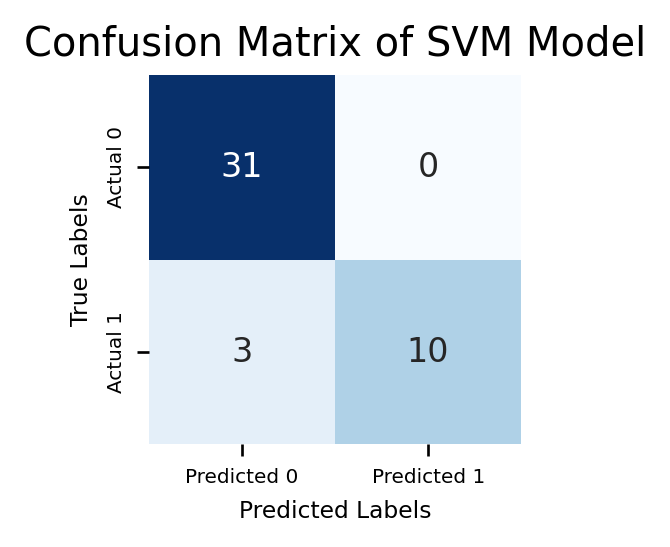

In [25]:
# Importing SVC from SVM 
from sklearn.svm import SVC

svm_pipeline = Pipeline([
    ('pre_process',Pre_pipeline),
    ('svm', SVC())
])

svm_params = {
    'svm__C': [0.1, 0.5, 1, 5,6,7,8,9, 10],
    'svm__kernel': ['linear', 'rbf', 'poly'],
}

svm_grid = GridSearchCV(svm_pipeline, param_grid=svm_params, cv=5,scoring=scoring, refit='roc_auc',return_train_score=True)
svm_grid.fit(X_train, y_train)

# Access the cv_results_ attribute
cv_results = svm_grid.cv_results_

# Store the best SCM fit for future use
svm_best = svm_grid.best_estimator_

kf = StratifiedKFold(n_splits=5)
metrics_list = {metric: [] for metric in metrics}
all_y_true = []
all_y_pred = []

X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

for train_index, test_index in kf.split(X_train_np, y_train_np):
    X_fold_train, X_fold_test = X_train_np[train_index], X_train_np[test_index]
    y_fold_train, y_fold_test = y_train_np[train_index], y_train_np[test_index]
    
    svm_best.fit(X_fold_train, y_fold_train)
    y_fold_pred = svm_best.predict(X_fold_test)
    
    all_y_true.extend(y_fold_test)
    all_y_pred.extend(y_fold_pred)
    
    fold_metrics = calculate_metrics(y_fold_test, y_fold_pred)
    for metric in metrics:
        metrics_list[metric].append(fold_metrics[metric])

# Calculate mean and std of metrics
mean_metrics = {metric: np.mean(values) for metric, values in metrics_list.items()}
std_metrics = {metric: np.std(values) for metric, values in metrics_list.items()}

# Print mean and std of metrics
for metric in metrics:
    print(f"{metric}: Mean = {mean_metrics[metric]:.3f}, Std = {std_metrics[metric]:.3f}")

# Calculate and print the combined confusion matrix
combined_conf_matrix = confusion_matrix(all_y_true, all_y_pred)
print(f"Combined Confusion Matrix:\n{combined_conf_matrix}")

# Get predictions from the best estimator and print metrics
svm_pred = svm_best.predict(X_test)

print('\n\n')
print("The best Parameters are ",svm_grid.best_params_)
prnt_metrics(y_test,svm_pred,"SVM")



accuracy: Mean = 0.949, Std = 0.033
balanced_accuracy: Mean = 0.941, Std = 0.044
precision: Mean = 0.950, Std = 0.033
recall: Mean = 0.949, Std = 0.033
f1: Mean = 0.949, Std = 0.034
roc_auc: Mean = 0.941, Std = 0.044
f0.1score: Mean = 0.950, Std = 0.033
f10score: Mean = 0.949, Std = 0.033
Combined Confusion Matrix:
[[118   5]
 [  4  49]]



The best Parameters are  {'lr__C': 2.0, 'lr__penalty': 'l2'}
Accuracy for the logistic regression Classifier 0.9318181818181818
Balanced Accuracy for the logistic regression Classifier 0.8846153846153846
Precision for the logistic regression Classifier 1.0
Recall for the logistic regression Classifier 0.7692307692307693
F1-score for the logistic regression Classifier 0.8695652173913043
ROC AUC of logistic regression: 0.8846153846153846
F0.1 score for the logistic regression Classifier 0.9970384995064164
F10 score for the logistic regression Classifier 0.7709923664122137
Confusion Matrix for the logistic regression Classifier


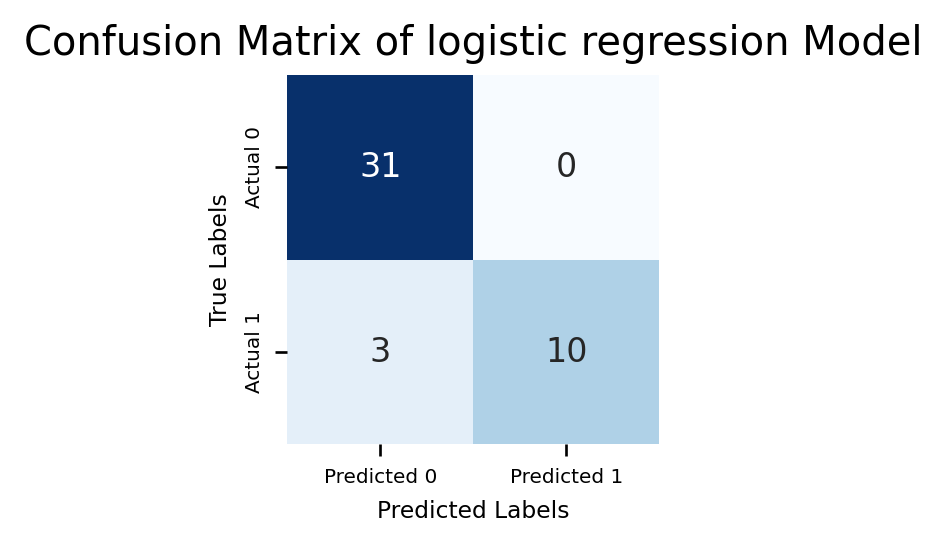

In [26]:
# Importing the Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Define the Logistic Regression pipeline
lr_pipeline = Pipeline([
    ('pre_process', Pre_pipeline),  # Assuming Pre_pipeline is defined
    ('lr', LogisticRegression(max_iter=100))  # Adjust max_iter as needed
])

# Define the parameter grid for Logistic Regression
lr_params = {
    'lr__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'lr__C': [0.1, 0.5, 1.0, 2.0, 5.0, 8.0 , 10.0],
    # Adjust other parameters as per your specific requirements
}

# Perform grid search
lr_grid = GridSearchCV(lr_pipeline, param_grid=lr_params, cv=5)
lr_grid.fit(X_train, y_train)

# Access the cv_results_ attribute
cv_results= lr_grid.cv_results_

# Storing the best Logistic Regression fit for future use
lr_best = lr_grid.best_estimator_

kf = StratifiedKFold(n_splits=5)
metrics_list = {metric: [] for metric in metrics}
all_y_true = []
all_y_pred = []

X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

for train_index, test_index in kf.split(X_train_np, y_train_np):
    X_fold_train, X_fold_test = X_train_np[train_index], X_train_np[test_index]
    y_fold_train, y_fold_test = y_train_np[train_index], y_train_np[test_index]
    
    lr_best.fit(X_fold_train, y_fold_train)
    y_fold_pred = lr_best.predict(X_fold_test)
    
    all_y_true.extend(y_fold_test)
    all_y_pred.extend(y_fold_pred)
    
    fold_metrics = calculate_metrics(y_fold_test, y_fold_pred)
    for metric in metrics:
        metrics_list[metric].append(fold_metrics[metric])

# Calculate mean and std of metrics
mean_metrics = {metric: np.mean(values) for metric, values in metrics_list.items()}
std_metrics = {metric: np.std(values) for metric, values in metrics_list.items()}

# Print mean and std of metrics
for metric in metrics:
    print(f"{metric}: Mean = {mean_metrics[metric]:.3f}, Std = {std_metrics[metric]:.3f}")

# Calculate and print the combined confusion matrix
combined_conf_matrix = confusion_matrix(all_y_true, all_y_pred)
print(f"Combined Confusion Matrix:\n{combined_conf_matrix}")

# Get predictions from the best estimator and print metrics
lr_pred = lr_best.predict(X_test)

print('\n\n')
print("The best Parameters are ",lr_grid.best_params_)
prnt_metrics(y_test,lr_pred,"logistic regression")



### 3.3 Final results

From the final results calculate the _probability_ that a sample from a person with a malignant tumour is given a result that they do not have cancer.

Accuracy for the Final_model Classifier 0.9545454545454546
Balanced Accuracy for the Final_model Classifier 0.9230769230769231
Precision for the Final_model Classifier 1.0
Recall for the Final_model Classifier 0.8461538461538461
F1-score for the Final_model Classifier 0.9166666666666666
ROC AUC of Final_model: 0.9230769230769231
F0.1 score for the Final_model Classifier 0.9982030548068282
F10 score for the Final_model Classifier 0.84744469870328
Confusion Matrix for the Final_model Classifier


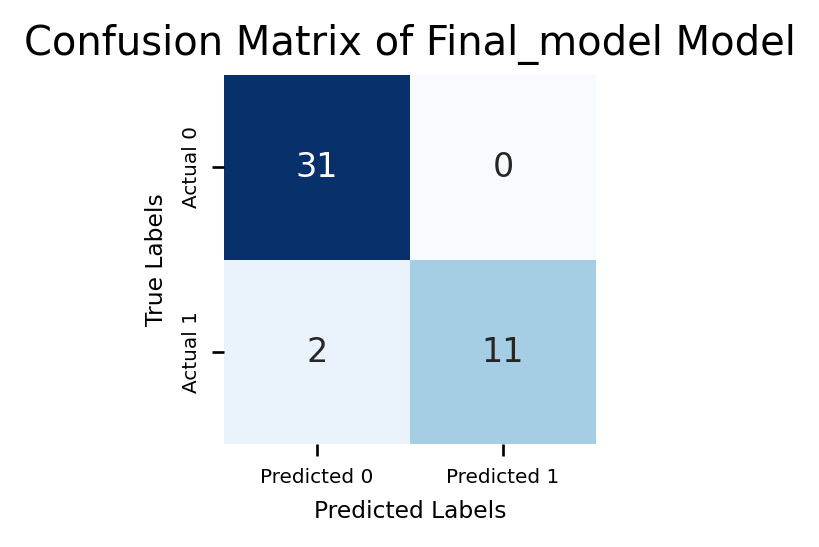

Probability that a person with a malignant tumor is incorrectly predicted to not have cancer: 0.15384615384615385


In [27]:
# Answer here
all_pred=sgd_best.predict(X_test)
prnt_metrics(y_test,all_pred,"Final_model")

cm=confusion_matrix(y_test,all_pred)
TN,FP,FN,TP=cm.ravel()

probability= FN/(FN+TP)

print("Probability that a person with a malignant tumor is incorrectly predicted to not have cancer:", probability)

#### Best Model 
  The best model fitted to the training data, using SimpleImputer and StandardScaler, is the SGD (Stochastic Gradient Descent) Classifier with the Hinge loss function and l2 regularization, featuring an alpha term of 0.0001. This model stands out due to its AUC score of 0.92, indicating a favorable trade-off between precision and recall.

## 4. Decision Boundaries [10%]
 - To finish up, the client wants a visualisation of how the final model is working and your line manager has asked you to show some of the decision boundaries.
 - The client also wants to know if your method has met their performance specifications.
 - Follow the next three steps (4.1, 4.2 and 4.3) to do these things.

### 4.1 Discriminative features

Although it is only possible to know the true usefulness of a feature when you've combined it with others in a machine learning method, it is still helpful to have some measure for how discriminative each feature is on its own.  One common method for doing this is to calculate a T-score (often used in statistics, and in the LDA machine learning method) for each feature.  

The formula for the T-score is:

_(mean(x2) - mean(x1))/(0.5*(stddev(x2) + stddev(x1)))_

where x1 and x2 are the feature values corresponding to the two classes. Large values for the T-score (either positive or negative) indicate discriminative ability.

**Calculate the T-score for each feature and print out the best 4 features according to this score.**

In [28]:
# Separate the features into two classes based on the target variable
class_0 = X_train[y_train == 0]
class_1 = X_train[y_train == 1]

# Function to calculate T-score
def calculate_t_score(mean1, mean2, std1, std2):
    return (mean2 - mean1) / (0.5 * (std2 + std1))

# Dictionary to store T-scores for each feature
t_scores = {}

# Calculate T-score for each feature using the given formula

for feature in X_train.columns:
    mean1 = class_0[feature].mean()
    mean2 = class_1[feature].mean()
    std1 = class_0[feature].std()
    std2 = class_1[feature].std()

    t_score = calculate_t_score(mean1, mean2, std1, std2)
    t_scores[feature] = t_score

# Sort the features by the absolute value of their T-scores in descending order
sorted_features = sorted(t_scores.items(), key=lambda item: abs(item[1]),reverse=True)[:4]

# Print the best 4 features according to the T-score

print("Top 4 features according to T-score:")
for feature, t_score in sorted_features:
    print(f'Feature: {feature}, T-score: {t_score}')

Top 4 features according to T-score:
Feature: mean concave points, T-score: 2.3633260859583096
Feature: mean perimeter, T-score: 1.853443193126673
Feature: mean area, T-score: 1.7502797914900976
Feature: mean radius, T-score: 1.7414393048569399


### 4.2 Visualise decision boundaries

**Display the decision boundaries** for each pair of features from the best 4 chosen above.  You can use the functions below to help if you like.

Instead of using the simple mean as the input for `xmean` in `plot_contours`, use the following:

_0.5*(mean(x1) + mean(x2))_

where x1 and x2 are the data associated with the two classes.  This way of calculating a "mean" point takes into account any imbalance between the classes.

In [29]:
# Calculating xmean from the given formula which takes account of any imbalance between the classes

# Separate data by classes
class0_data = X_train[y_train == 0]
class1_data = X_train[y_train == 1]

# Calculate class means
mean_class0 = class0_data.mean(axis=0)
mean_class1 = class1_data.mean(axis=0)

# Compute xmean as a 1D array
xmean = 0.5 * (mean_class0 + mean_class1)

In [30]:
def make_meshgrid(x, y, ns=100):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on (only min and max used)
    y: data to base y-axis meshgrid on (only min and max used)
    ns: number of steps in grid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()
    hx = (x_max - x_min)/ns
    hy = (y_max - y_min)/ns
    xx, yy = np.meshgrid(np.arange(x_min, x_max + hx, hx), np.arange(y_min, y_max + hy, hy))
    return xx, yy

In [31]:
def plot_contours(clf, xx, yy, xmean, n1, n2, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    xmean : 1d array of N mean values (used to populate constant features with)
    n1, n2: index numbers of features that change
              that is, which features xx and yy represent, from the set of N features
    params: dictionary of params to pass to contourf, optional
    """
    # The following lines makes an MxN matrix to pass to the classifier (# samples x # features)
    # It does this by multiplying Mx1 and 1xN matrices, where the former is filled with 1's
    #  where M is the number of grid points in xx and N is the number of features in xmean
    #  It is done in such a way that the xmean vector is replaced in each row
    fullx = np.ones((xx.ravel().shape[0],1)) * np.reshape(xmean,(1,-1))
    fullx[:,n1] = xx.ravel()
    fullx[:,n2] = yy.ravel()
    Z = clf.predict(fullx)
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out


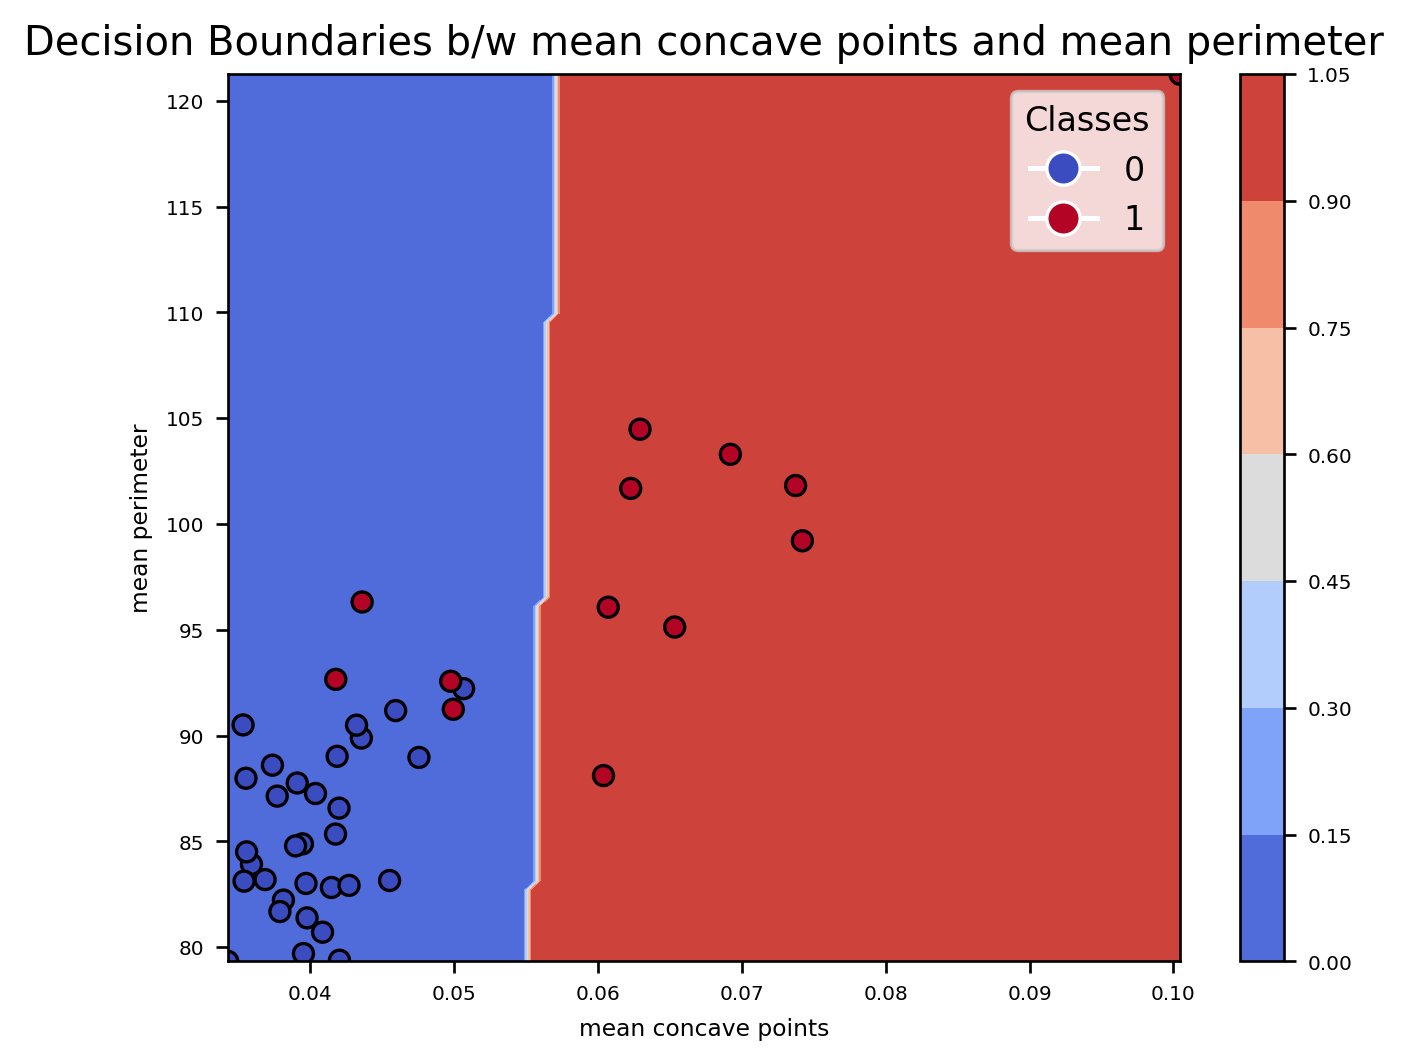

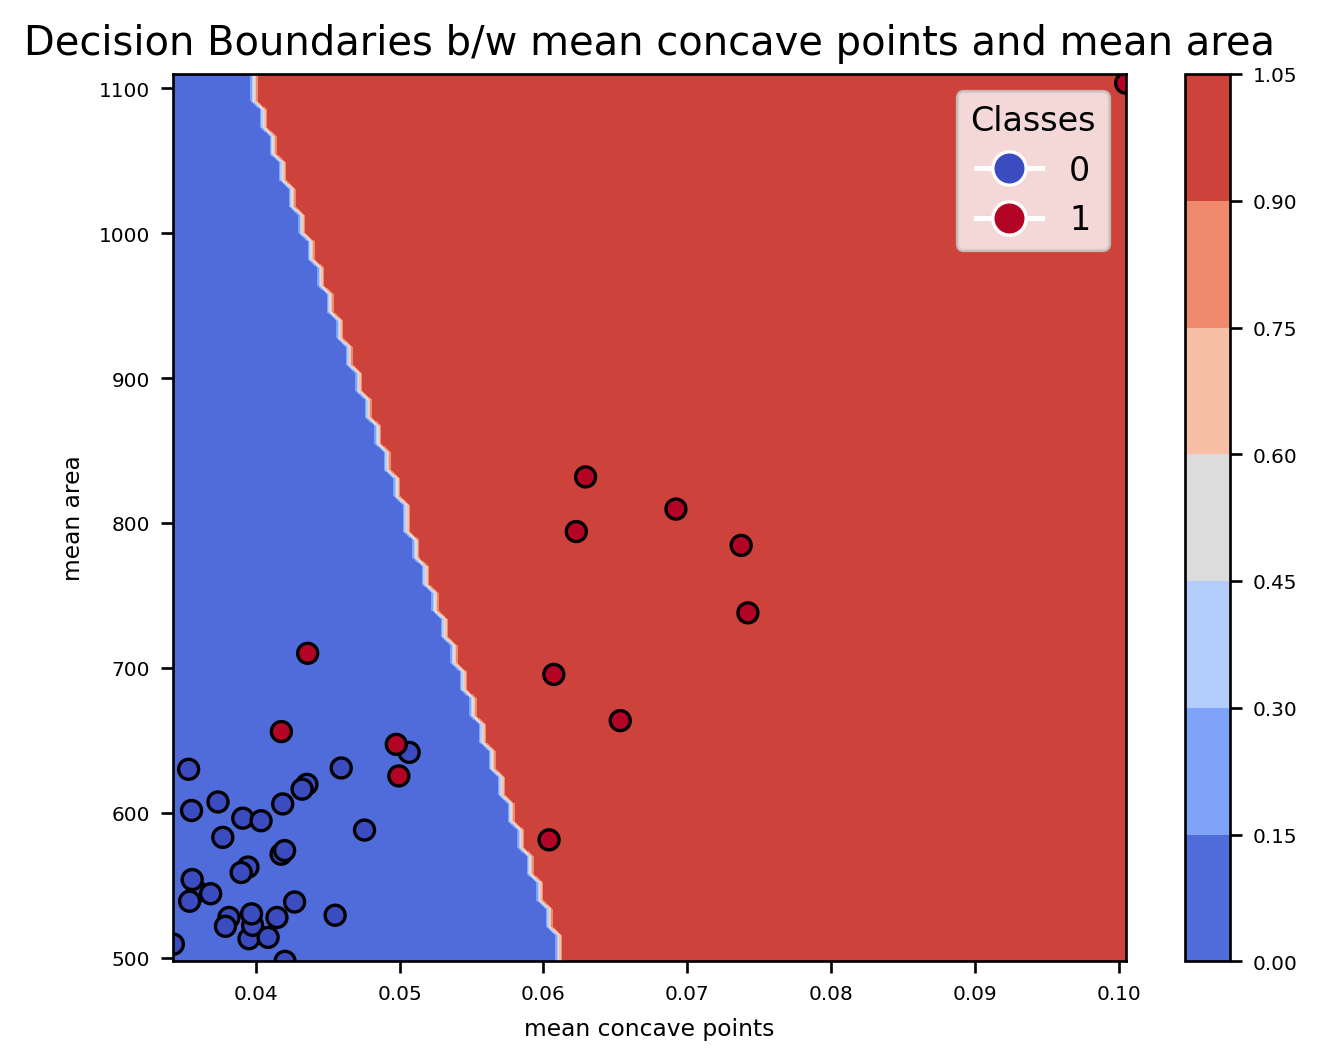

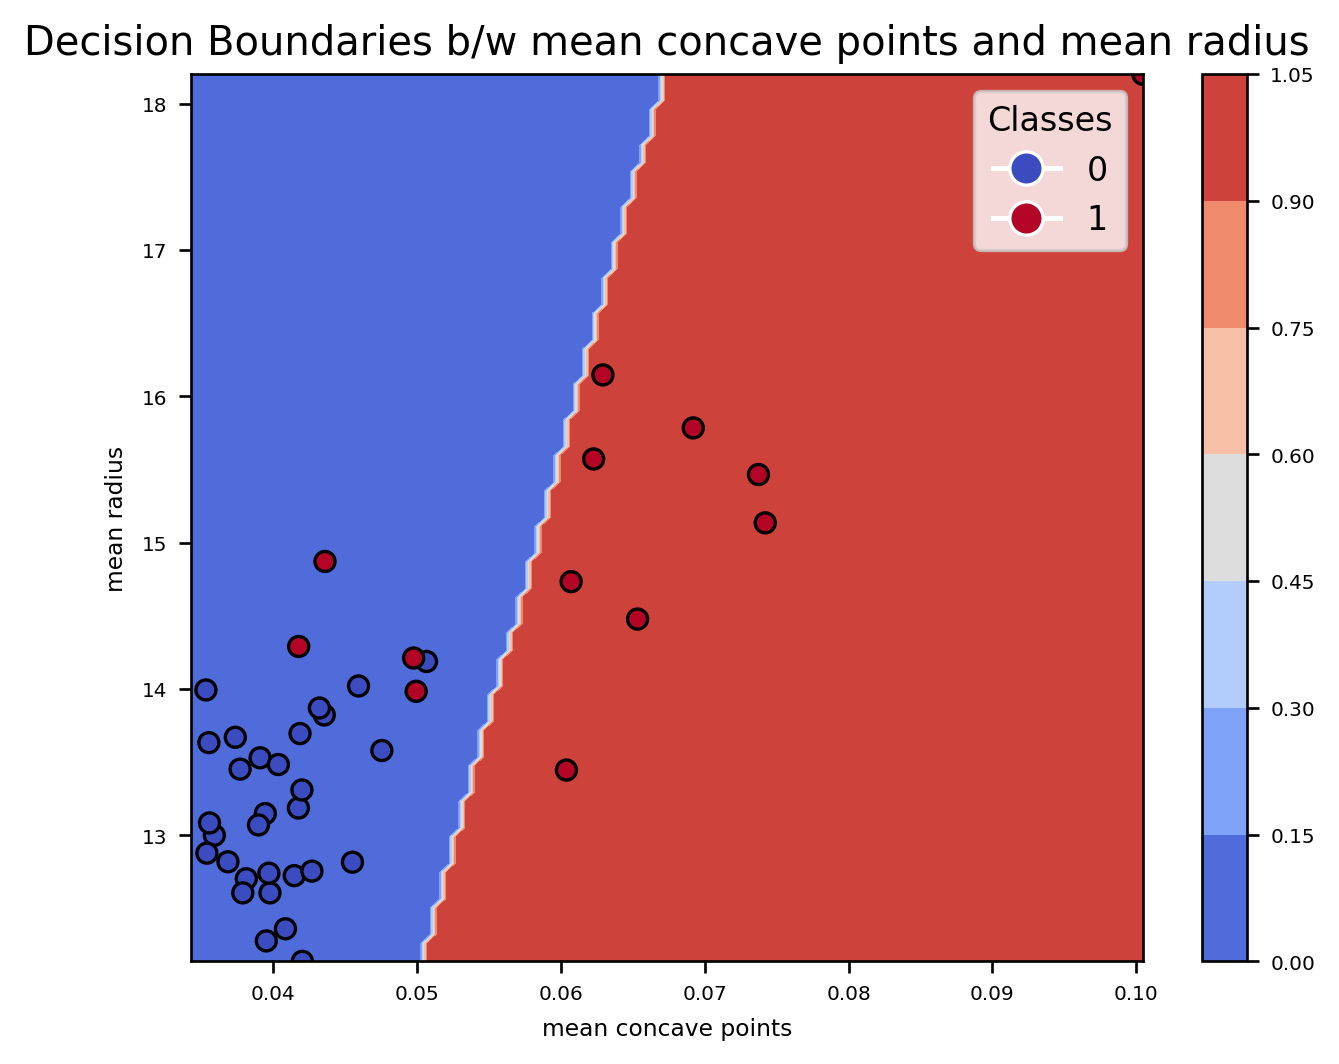

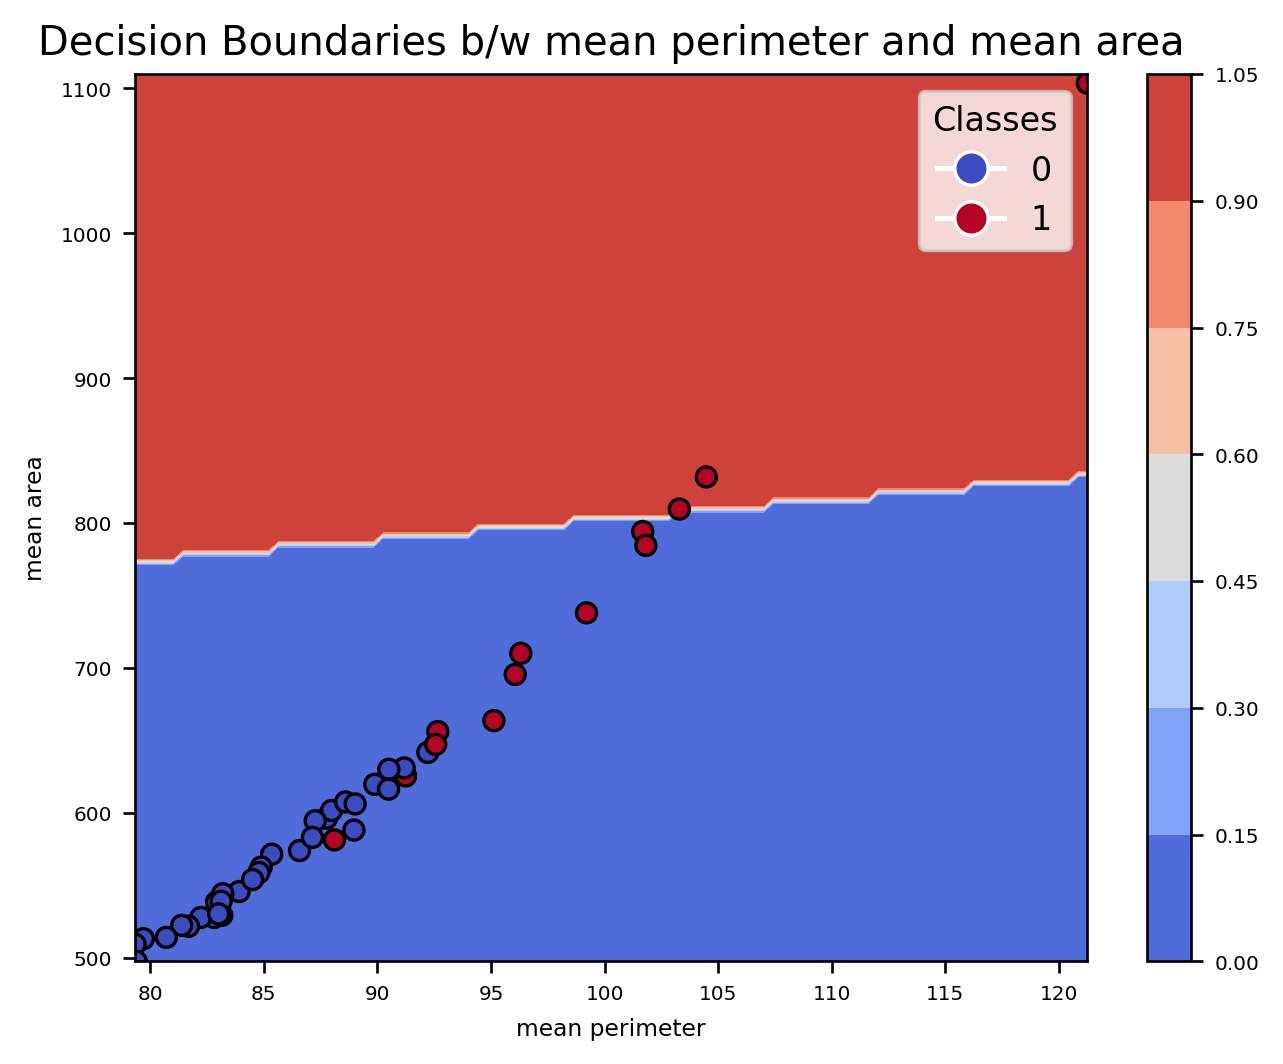

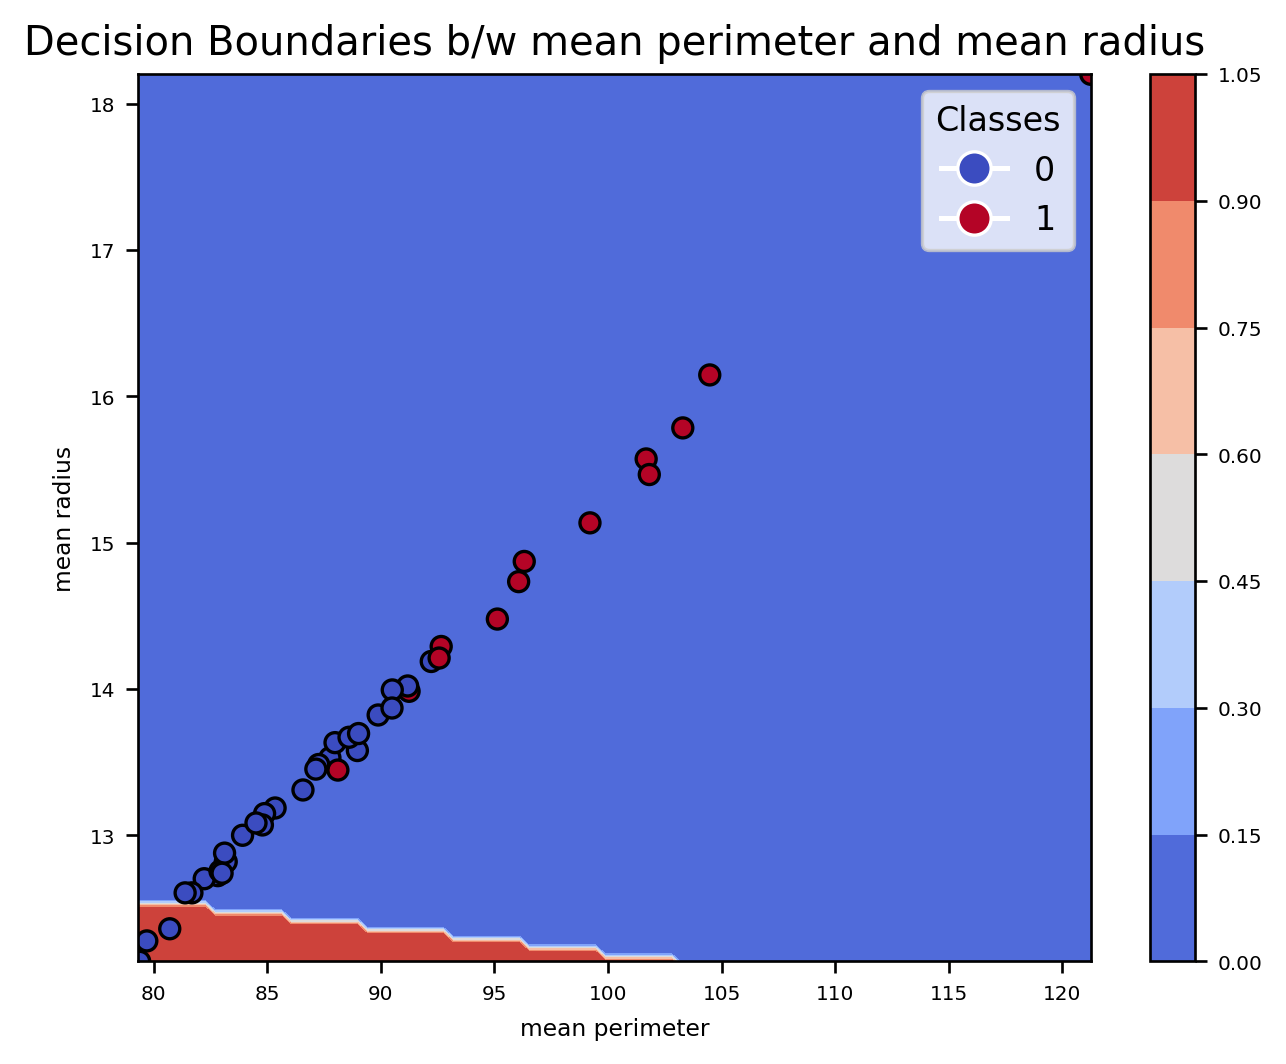

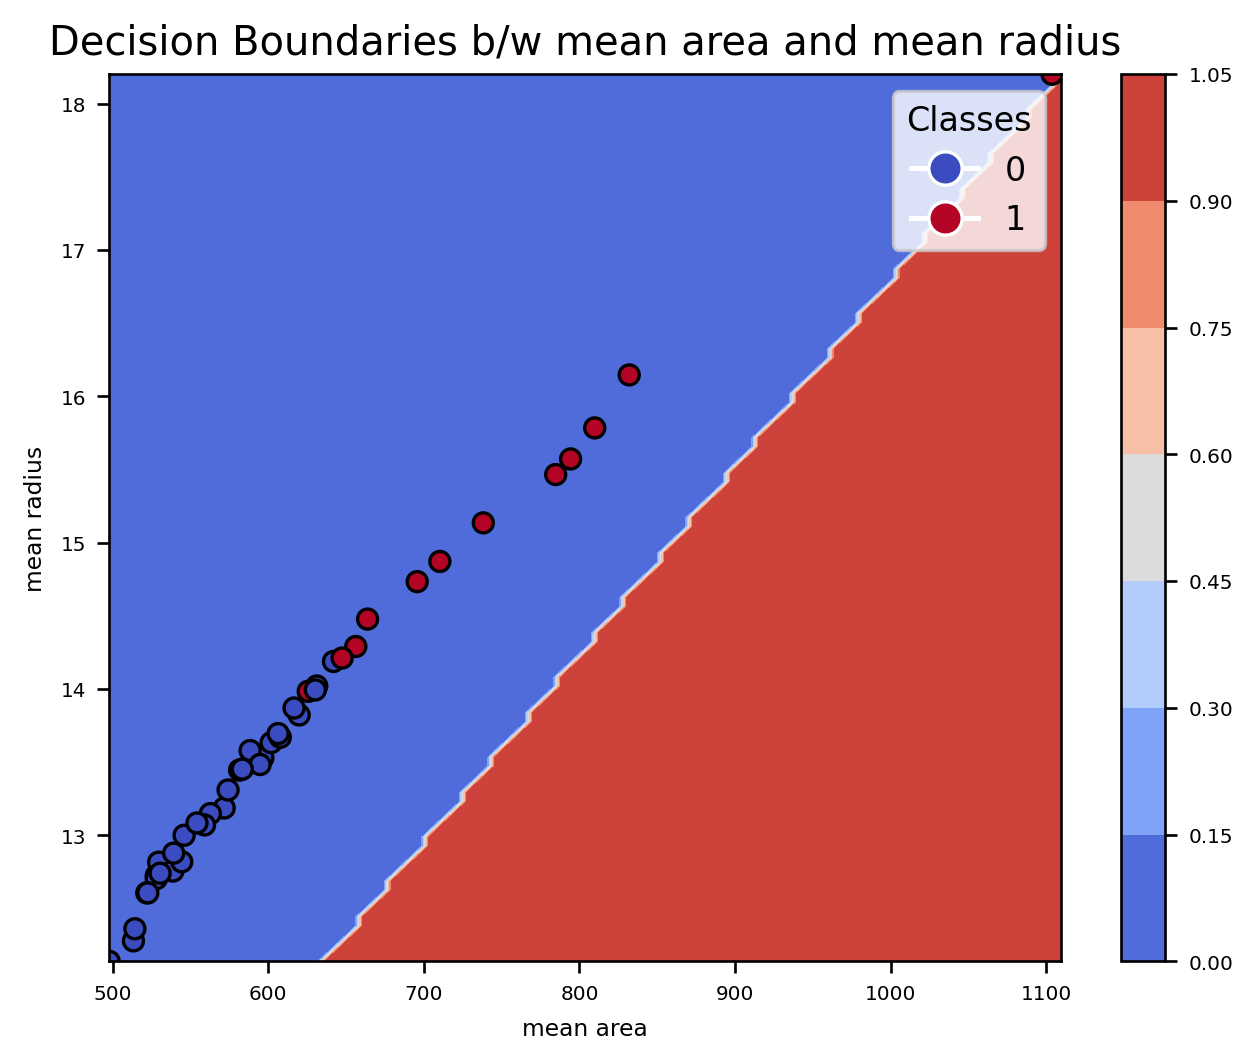

In [32]:
# Assuming clf is your trained classifier
clf = sgd_best

# Define class names (adjust these to match your classes)
class_names = ['0', '1']

# Iterating through the best 4 features from the previous step
for i in range(4):
    for j in range(i+1, 4): 
        # Generate the meshgrid for the selected feature
        xx, yy = make_meshgrid(X_test[sorted_features[i][0]], X_test[sorted_features[j][0]])
        n1 = X_test.columns.get_loc(sorted_features[i][0])
        n2 = X_test.columns.get_loc(sorted_features[j][0])
        
        # Plot decision boundaries for the selected feature
        out = plot_contours(clf, xx, yy, xmean, n1, n2, cmap='coolwarm')

        # Add labels, title
        plt.xlabel(sorted_features[i][0])
        plt.ylabel(sorted_features[j][0])
        plt.title(f'Decision Boundaries b/w {sorted_features[i][0]} and {sorted_features[j][0]}')

        # Add colorbar for the decision boundary 
        plt.colorbar(out)
        
        # Scatter plot the values of the feature to clearly visualize
        scatter = plt.scatter(X_test.iloc[:, n1], X_test.iloc[:, n2], c=y_test, cmap='coolwarm', edgecolors='k')

        # Create a legend for the scatter plot
        handles = [plt.Line2D([0], [0], marker='o', color='w', label=class_names[k],
                              markerfacecolor=plt.cm.coolwarm(k/1), markersize=10) for k in range(2)]
        plt.legend(handles=handles, title='Classes')

        # Show the plot
        plt.show()


#### Observation regarding Decision Boundaries

 Upon examining the decision boundaries depicted in the aforementioned plots, some are effective at distinguishing between classes, while others fail to do so. This discrepancy arises from the collinearity observed among certain features.

### 4.3 Performance specification
**Does the final model meet the client's criteria?  Explain why or why not.** [100 words maximum]

The breast cancer prediction model has partially fulfilled the criteria set by the client. It has achieved a recall score of 0.846, just shy of the 90% threshold for correctly identifying malignant cases. However, it excelled with a 0% false positive rate, exceeding the requirement to keep false positives below 20%. Thus, while the model falls short on one criterion, its exceptional performance in minimizing false positives highlights its reliability in accurately identifying benign cases.